In [1]:
rm(list = ls())

Set your working directory. A useful RStudio hotkey is as follows:
ctrl + shift + h

Next, install and load all necessary packages.

In [4]:
if (!require("pacman")) install.packages("pacman")
pacman::p_load(devtools, rtweet, httpuv, tidyverse, tidytext, maps, ggthemes)

## Twitter API Connection

Click on this [link](https://cran.r-project.org/web/packages/rtweet/vignettes/auth.html) to review a quick and comprehensive vignette of the ```rtweet``` package that will be used in this demonstration.


In [6]:
#name of app
appname = "blm_tweet_test"

## api key (to be updated w/ real key)
key = "fAhyb4wRb6dIvBIJRjdE9iduN"

## api secret (example below is not a real key)
secret = "YYw0bTSmVA3ZIeiR981rM3jfyL8iLcPImNXI0o1RtZT39OKpUn"

## authentication api tokens
access_token = "538600108-DkrfuLWVJkLyCx6lV2SyltRM35z42Cfmy66kkfSp"
access_secret = "apK9CV8QvMv8vbDWjlRDSJQGSUUpnOpzvY218PjvCx2aF"

# create token to obtain access to api
twitter_token = create_token(
    app = appname,
    consumer_key = key,
    consumer_secret = secret,
    access_token = access_token,
    access_secret = access_secret)
# twitter_token

In [7]:
#query twets on 
blm_tweets = search_tweets(q = "#BLM", #search term
                           n = 200, #~number of tweets to query
                           include_rts = FALSE, #exclude retweets
                           #wake county, nc coordinates - 20mi radius
                           geocode = "35.78,-78.63,20mi")

In [8]:
#random display 10 of the quered tweets
sample(blm_tweets$text, 10)

[1] "The Unity in Community's “Take Down the Monument” at  Mt. Zion United Methodist Church in Cornelius, NC where local men enlisted for the Confederate war effort. Dedicated in 1910 it's one of the last Confederate monuments left standing in Mecklenburg County. @Move_Silent_Sam #BLM https://t.co/luFvrfKUEu"
 [2] "Fayetteville Protesters Make Headway With Demands\nhttps://t.co/vnwTgFo73C\n\n#protests #blm #blacklivesmatter #breonnataylor #georgefloyd #elijahmcclain #handsup #dontshoot https://t.co/iwXZdvFFQp"                                                                                                           
 [3] "What’s the difference between black face and white Jesus? Nothing. They both perpetuate white supremacy #BLM https://t.co/Vf9DXK1SvQ"                                                                                                                                                                            
 [4] "afroleta decided on chocolate...but what about you?! How ya like them pancakes?! \U0001f603❤️\U0001f95e⁣\n\n#itsreallyvegan #pancakes #waffles #easy #fun #chocolate #BLM #blacklivesmatter #veganpancakes #veganwaffles… https://t.co/Q68AfCuySp"                                                                 
 [5] "Important!!! Long list of resources supporting #blm movement https://t.co/yTT6BbTumo"                                                                                                                                                                                                                            
 [6] "@RudyGiuliani Rudy, Rudy, Rudy. Peddle you’re hate elsewhere. #BLM"                                                                                                                                                                                                                                              
 [7] "As #BlackMen we don't need social justice. We need economic equity! \nWe must repair black families by economically empowering black men to lead them as husbands. That is the only way for #blackprogression for All #BLM has in their manifesto \n\u270a\U0001f3fe\U0001f3c1"                                  
 [8] "#BLM is a #fraud #BLM is a #fraud #BLM is a #fraud #BLM is a #fraud https://t.co/UM3MduZGaV"                                                                                                                                                                                                                     
 [9] "Everything old is new again.\n\nAnyone over 50 remembers the Weather Underground and the Black Panther Party. They were the #BLM of the 60s, 70s, and 80s. It's the same people, the same playbook, the same fake concern for a minority grp, used as a front for Socialist ideology. https://t.co/6hovVS6u8y"   
[10] "A #BLM shirt shouldve been fine. It was designed to empower TMs free speech within certain limitations.\n\nEven a #MAGA shirt would've been ok.\n\nJust not a #whenthelootingstartstheshootingstarts shirt, for example."

In [9]:
#query users who tweeted about BLM - location invariate
blm_users = search_users(q = "#BLM", 
                         n = 200)

Searching for users...

Finished collecting users!



In [10]:
#randomly sample users and preview tweet text
sample(blm_users$text, 10) #clearly users aren't always tweeting about BLM!

[1] "$104,000 has been received at the BTC address involved in the Twitter hack so far. More than 250 transactions so far"                                                                                                                                             
 [2] "In historic move, North Carolina city approves reparations for Black residents https://t.co/DtDvUn0p5m via @usatoday"                                                                                                                                             
 [3] "@michaelrosenbum @grantimahara I’m feeling the same way. I just saw him on Friday. It just doesn’t make sense."                                                                                                                                                   
 [4] "@Skyla_Pink omg i bet hahaha"                                                                                                                                                                                                                                     
 [5] "Twitter has become RuneScape https://t.co/ZLKGzhe5Ip"                                                                                                                                                                                                             
 [6] "What is happening to the Uighur people in Xinjiang, China meets the definition of genocide under the UN Genocide Convention.    \n\n@RayhanAsat and I argue in @ForeignPolicy that if we fail to call it what it is, we are complicit.\n\nhttps://t.co/SQIptl9iQd"
 [7] "BECAUSE JELLICLES ARE AND JELLICLES DO"                                                                                                                                                                                                                           
 [8] "Sweet Christmas. It's like they want large swathes of the population to die. I hate this administration with the power and heat of 1000 suns.\n\nhttps://t.co/y0xFLgdl23"                                                                                         
 [9] "@kungfusquirrel https://t.co/lrEy0YQqCV"                                                                                                                                                                                                                          
[10] "So this new @uhnkmusic is pretty tasty...\n\nhttps://t.co/H9cuwIuUqa\n\n@ProducerDojo represent!"

In [11]:
#how many locations did we end up catching 
length(unique(blm_tweets$location)) #21 diffeent places!

[1] 21

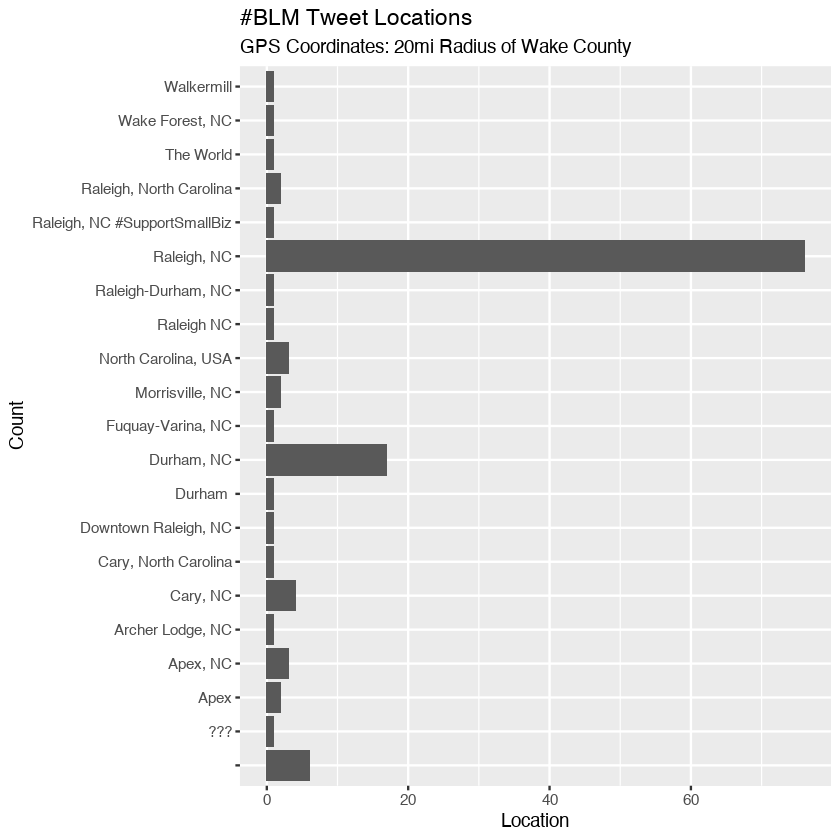

In [12]:
blm_tweets %>%
    filter(!is.na(location)) %>% #rm missing but random characters still remain
    ggplot(aes(location)) + #column of interest
    geom_bar() + #chart type
    coord_flip() + #flip axes
    labs(x = "Count",
         y = "Location",
         title = "#BLM Tweet Locations", 
         subtitle = "GPS Coordinates: 20mi Radius of Wake County")

In [14]:
#check out words
data("stop_words")
head(stop_words, 10)

word,lexicon
<chr>,<chr>
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART
accordingly,SMART
across,SMART
actually,SMART


In [16]:
# remove http elements manually
blm_tweets$stripped_text =  gsub("http.*","",  blm_tweets$text)
blm_tweets$stripped_text = gsub("https.*","", blm_tweets$stripped_text)


blm_tweets_cln = blm_tweets %>% 
    dplyr::select(stripped_text) %>%
    unnest_tokens(word, stripped_text)

# remove stop words from your list of words
final_blm = blm_tweets_cln %>%
    anti_join(stop_words)

Joining, by = "word"



Selecting by n



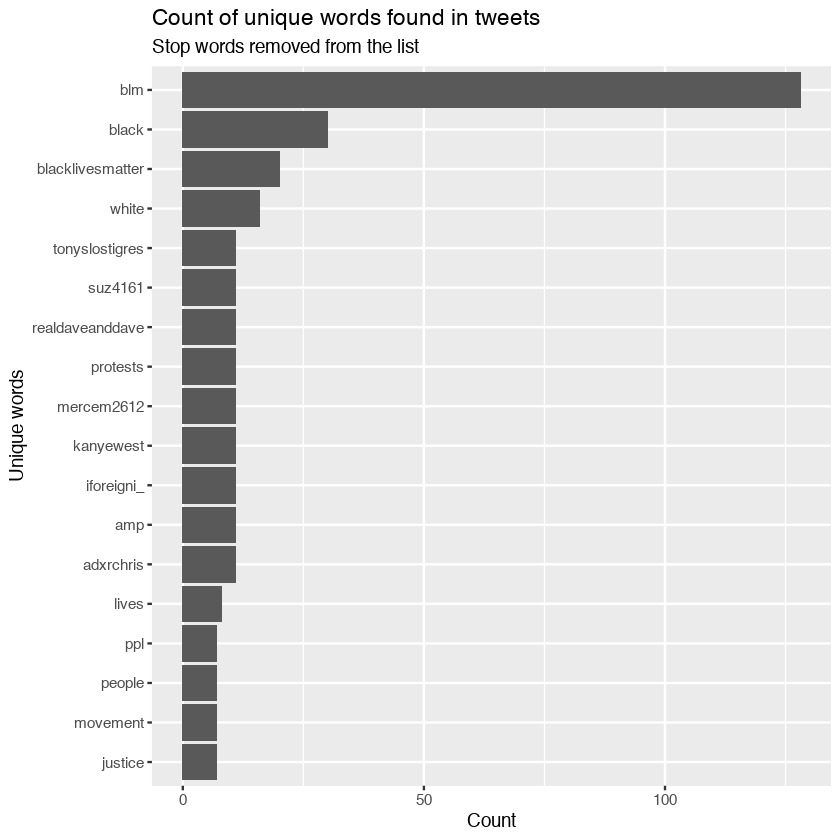

In [17]:
final_blm %>%
    count(word, sort = TRUE) %>%
    top_n(15) %>%
    mutate(word = reorder(word, n)) %>%
    ggplot(aes(x = word, y = n)) +
    geom_col() +
    xlab(NULL) +
    coord_flip() +
    labs(y = "Count",
         x = "Unique words",
         title = "Count of unique words found in tweets",
         subtitle = "Stop words removed from the list")